  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o

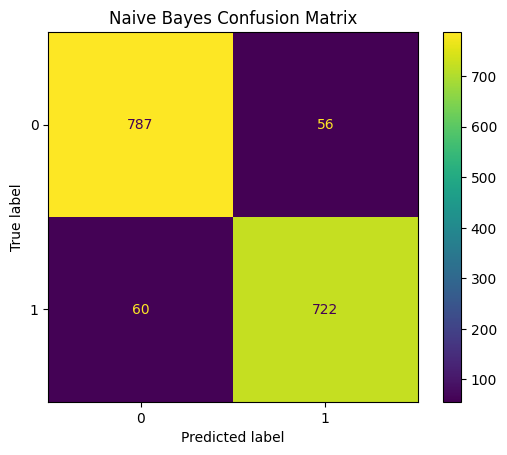


Decision Tree Accuracy: 1.0
Decision Tree Confusion Matrix:
 [[843   0]
 [  0 782]]


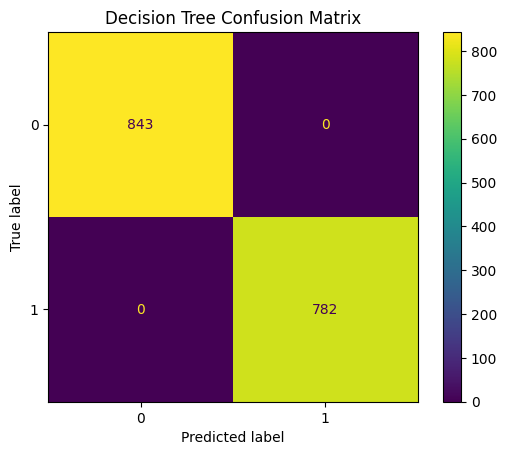


Cross Validation Results:
Naive Bayes: [0.67507692 0.93538462 0.79938462 0.688      0.49445813]
Decision Tree: [0.84246154 1.         0.99753846 1.         0.68965517]
NB Mean Accuracy: 0.7184608563849941
DT Mean Accuracy: 0.9059310344827587


In [ ]:
# ---------------------------------------------------------
# Mushroom Classification - Naive Bayes & Decision Tree
# ---------------------------------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------

# Dataset file name may be mushroom.csv or agaricus-lepiota.csv
df = pd.read_csv("Navy Bays_Mushroom Dataset.csv")

print(df.head())
print(df.shape)

# ---------------------------------------------------------
# 2. Label Encoding (Convert categorical → numeric)
# ---------------------------------------------------------

label = LabelEncoder()
for col in df.columns:
    df[col] = label.fit_transform(df[col])

# Target and Features
X = df.drop("poisonous", axis=1)   # all predictors
y = df["poisonous"]                # target: edible(0) or poisonous(1)

# ---------------------------------------------------------
# 3. Split into Train and Test
# ---------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# ---------------------------------------------------------
# 4. Model 1 — Naive Bayes
# ---------------------------------------------------------

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

print("\nNaive Bayes Accuracy:", nb_acc)
print("Naive Bayes Confusion Matrix:\n", nb_cm)

ConfusionMatrixDisplay(nb_cm).plot()
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# ---------------------------------------------------------
# 5. Model 2 — Decision Tree
# ---------------------------------------------------------

dt_model = DecisionTreeClassifier(criterion="entropy")
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("\nDecision Tree Accuracy:", dt_acc)
print("Decision Tree Confusion Matrix:\n", dt_cm)

ConfusionMatrixDisplay(dt_cm).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()

# ---------------------------------------------------------
# 6. Cross-Validation for Verification
# ---------------------------------------------------------

nb_cv = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')
dt_cv = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

print("\nCross Validation Results:")
print("Naive Bayes:", nb_cv)
print("Decision Tree:", dt_cv)
print("NB Mean Accuracy:", nb_cv.mean())
print("DT Mean Accuracy:", dt_cv.mean())